# FLOPs lookup analysis

Load a CSV exported by `extract_flops_lookup.py`, then show distribution stats and plots (FLOPs, GT, and FLOPs vs GT). Text/legends in English; comments in Chinese.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 配置：指定要读取的 CSV 路径
CSV_PATH = Path("./flops_lookup/flops_macro_segmentsemantic.csv")  # 根据需要修改

# 读取 CSV
assert CSV_PATH.exists(), f"CSV not found: {CSV_PATH}"
df = pd.read_csv(CSV_PATH)
print(f"Loaded {len(df)} rows from {CSV_PATH}")
df.head()



Loaded 3256 rows from flops_lookup\flops_macro_segmentsemantic.csv


,arch_str,flops,gt
0,64-3334-basic,1.178661e+09,94.140274
1,64-33332-basic,1.181096e+09,94.073547
2,64-333312-basic,1.183463e+09,94.069191
3,64-33341-basic,1.188114e+09,94.018074
4,64-33314-basic,1.188131e+09,94.148293


In [3]:
# 基础统计信息
print("Columns:", df.columns.tolist())
print("\nDescribe FLOPs:")
print(df['flops'].describe())
print("\nDescribe GT:")
print(df['gt'].describe())



Columns: ['arch_str', 'flops', 'gt']

Describe FLOPs:
count    3.256000e+03
mean     9.370221e+09
std      1.169354e+10
min      1.178661e+09
25%      2.779300e+09
50%      5.181407e+09
75%      1.093442e+10
max      1.443116e+11
Name: flops, dtype: float64

Describe GT:
count    3256.000000
mean       94.386110
std         0.203922
min        93.784271
25%        94.228489
50%        94.396507
75%        94.553680
max        94.858452
Name: gt, dtype: float64


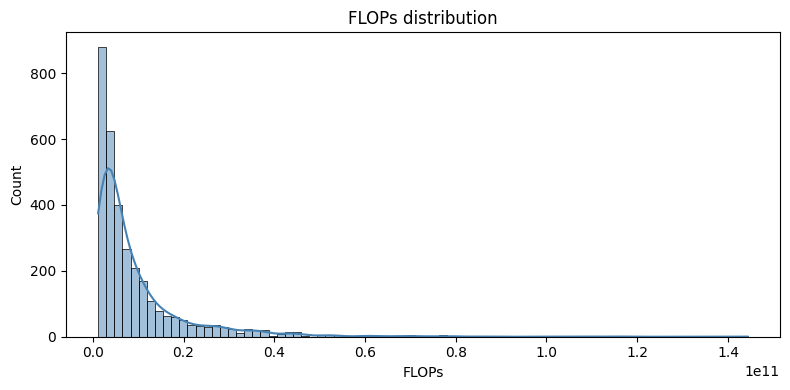

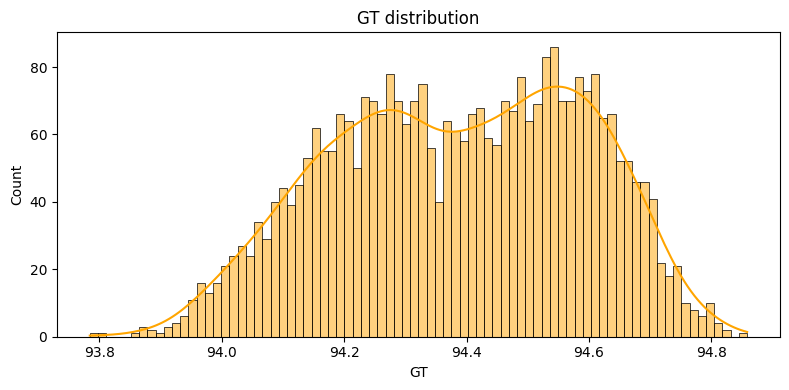

In [4]:
# FLOPs 分布直方图
plt.figure(figsize=(8, 4))
sns.histplot(df['flops'], bins=80, kde=True, color='steelblue')
plt.title('FLOPs distribution')
plt.xlabel('FLOPs')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# GT 分布直方图
plt.figure(figsize=(8, 4))
sns.histplot(df['gt'], bins=80, kde=True, color='orange')
plt.title('GT distribution')
plt.xlabel('GT')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



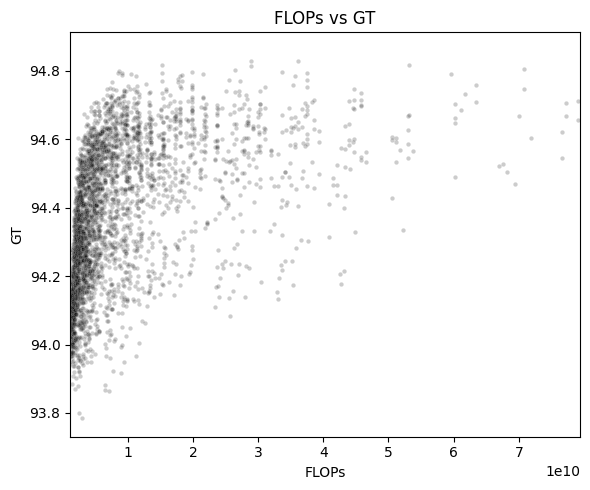

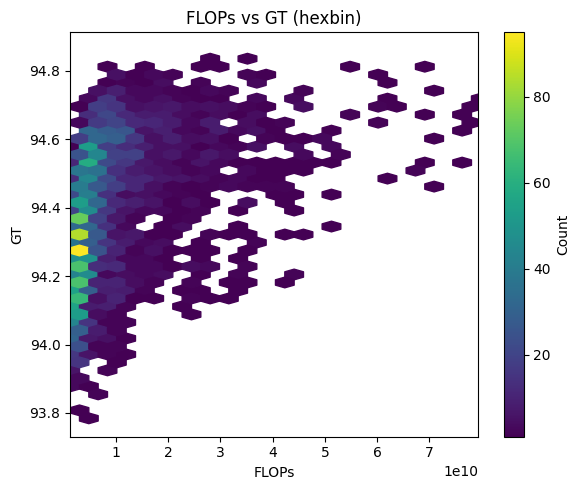

In [5]:
xlim = max(df['flops'])*0.55
# FLOPs vs GT 二维分布（散点 + 密度背景）
plt.figure(figsize=(6, 5))
# sns.kdeplot(x=df['flops'], y=df['gt'], fill=True, cmap='Blues', thresh=0.05, alpha=0.6)
sns.scatterplot(x=df['flops'], y=df['gt'], s=10, color='black', alpha=0.2)
plt.title('FLOPs vs GT')
plt.xlim(min(df['flops']), xlim)
plt.xlabel('FLOPs')
plt.ylabel('GT')
plt.tight_layout()
plt.show()

# 可选：hexbin，更清晰稀疏/密集区域
plt.figure(figsize=(6, 5))
plt.hexbin(df['flops'], df['gt'], gridsize=40, cmap='viridis', mincnt=1)
plt.colorbar(label='Count')
plt.title('FLOPs vs GT (hexbin)')
plt.xlabel('FLOPs')
plt.xlim(min(df['flops']), xlim)
plt.ylabel('GT')
plt.tight_layout()
plt.show()

